In [79]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from read_roi import read_roi_zip
from collections import OrderedDict, Counter
import math
import PIL
from PIL import Image
from PIL.TiffTags import TAGS
import tkinter as tk
from tkinter import filedialog
import seaborn as sns
import scipy as sp

In [4]:
path = Path('D:/Sofia/2020-02-04_DIC_TUBcontrol')
dateloc = str(path).find("2020")
date = str(path)[dateloc : dateloc+10]
path

WindowsPath('D:/Sofia/2020-02-04_DIC_TUBcontrol')

In [5]:
data_old2018_oldDTT = pd.read_csv(path/(date +'_0.csv'),sep=',',index_col=0);
data_old2018_oldDTT['Name']='Old 2018 Old DTT'
data_new2019 = pd.read_csv(path/(date +'_1.csv'),sep=',',index_col=0);
data_new2019['Name']='New 2019 New DTT'
data_old2018 = pd.read_csv(path/(date +'_2.csv'),sep=',',index_col=0);
data_old2018['Name']='Old 2018 New DTT'
data_new2018 = pd.read_csv(path/(date +'_3.csv'),sep=',',index_col=0);
data_new2018['Name']='New 2018 New DTT'
data = pd.concat([data_old2018_oldDTT, data_old2018,data_new2018,data_new2019])
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,CH,Concentration $(\mu M)$,Growth Rate $(\mu m / min)$,Length $(\mu m)$,Lifetime $(min)$,Name,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Time to Nucleate $(min)$
Date,,,,,,,,,,
2020-02-04,11,10.0,4.719408,4.922114,1.042952,Old 2018 Old DTT,NaN,NaN,NaN,0.121772
2020-02-04,11,10.0,1.988029,12.117922,6.095445,Old 2018 Old DTT,NaN,NaN,NaN,0.187497
2020-02-04,11,10.0,2.423914,5.898724,2.433554,Old 2018 Old DTT,NaN,NaN,NaN,0.226067
2020-02-04,11,10.0,5.366091,8.057487,1.501556,Old 2018 Old DTT,NaN,NaN,NaN,0.548463
2020-02-04,11,10.0,4.656982,6.421449,1.378886,Old 2018 Old DTT,NaN,NaN,NaN,0.211354
...,...,...,...,...,...,...,...,...,...,...
2020-02-04,12,10.0,NaN,NaN,NaN,New 2019 New DTT,NaN,NaN,NaN,NaN
2020-02-04,12,10.0,1.099042,7.722600,7.026667,New 2019 New DTT,7.8492,0.680000,11.542941,0.510000
2020-02-04,12,10.0,1.098646,11.330700,10.313333,New 2019 New DTT,11.2674,0.340000,33.139412,0.510000


In [12]:
data = data.rename(columns={'Growth Rate ' r'$(\mu m / min)$': 'Growth Rate (um / min)'})

Text(0.5, 0.98, '[Tubulin]$= 10\\mu M$')

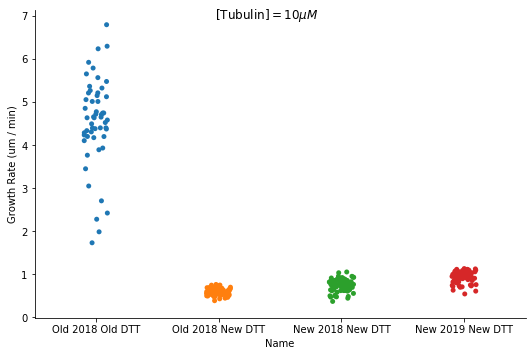

In [23]:
ax = sns.catplot(x="Name", y="Growth Rate (um / min)", data=data, aspect=1.5)
ax.fig.suptitle('[Tubulin]' r'$= 10\mu M$')

Text(0.5, 0.98, '[Tubulin]$= 10\\mu M$')

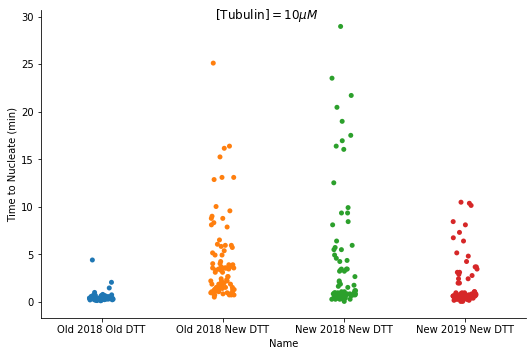

In [6]:
data = data.rename(columns={'Time to Nucleate ' r'$(min)$': 'Time to Nucleate (min)'})
ax = sns.catplot(x="Name", y='Time to Nucleate (min)', data=data, aspect=1.5)
ax.fig.suptitle('[Tubulin]' r'$= 10\mu M$')

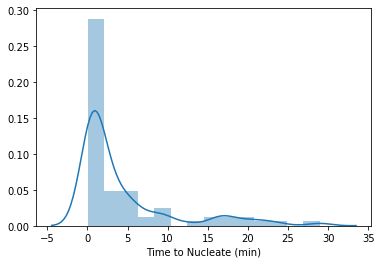

In [25]:
ax = sns.distplot(data[data['Name'] == 'New 2018 New DTT']['Time to Nucleate (min)'].dropna())

In [133]:
N18

Date
2020-02-04     5.496667
2020-02-04     0.850000
2020-02-04     3.230000
2020-02-04    20.456667
2020-02-04    16.376667
                ...    
2020-02-04     0.623333
2020-02-04     1.076667
2020-02-04     0.736667
2020-02-04     1.190000
2020-02-04     0.396667
Name: Time to Nucleate (min), Length: 79, dtype: float64

In [26]:
N18 = data[data['Name'] == 'New 2018 New DTT']['Time to Nucleate (min)'].dropna()

In [27]:
N18.mean()

4.393459915611813

In [38]:
data_new2019_2Nuc = pd.read_csv(path/(date +'_1_2Nuc.csv'),sep=',',index_col=0);
data_new2019_2Nuc['Name']='New 2019 New DTT'
data_old2018_2Nuc = pd.read_csv(path/(date +'_2_2Nuc.csv'),sep=',',index_col=0);
data_old2018_2Nuc['Name']='Old 2018 New DTT'
data_new2018_2Nuc = pd.read_csv(path/(date +'_3_2Nuc.csv'),sep=',',index_col=0);
data_new2018_2Nuc['Name']='New 2018 New DTT'
data_2Nuc = pd.concat([data_old2018_2Nuc,data_new2018_2Nuc,data_new2019_2Nuc])
data_2Nuc = data_2Nuc.drop(columns=['Time to Nucleate ' r'$(min)$'])

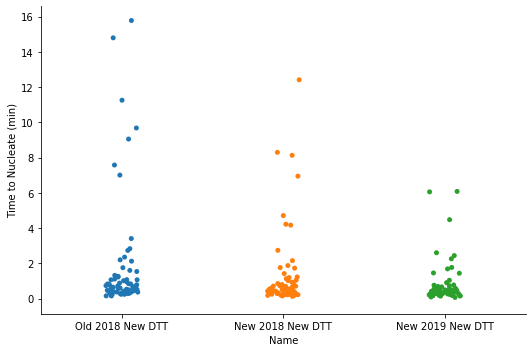

In [39]:
data_2Nuc = data_2Nuc.rename(columns={'Lifetime ' r'$(min)$': 'Time to Nucleate (min)'})
ax = sns.catplot(x="Name", y='Time to Nucleate (min)', data=data_2Nuc, aspect=1.5)

In [82]:
def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))


def exponential_fit(data):
    r = {'scale e':np.empty(0)}
    results = pd.DataFrame(data=r)
    
    y = data.dropna().values

    n, bins, patches = plt.hist(y, bins=np.arange(0, 60 + 0.5, 0.5), density=True);
    plt.clf()

    coeff, var_matrix = sp.optimize.curve_fit(exponential,bins[:-1],n)

    variance = np.diagonal(var_matrix) #Refer [3]
    SE = np.sqrt(variance) #Refer [4]

#======Making a data frame========
    r = {'scale e':[coeff[0],SE[0]]}
    results0 = pd.DataFrame(data=r, index=(['Value','SE']))
    results = pd.concat([results, results0], sort=False)
    
    return results

In [102]:
blue = '#23459C'
orange = '#FF7300'
green = '#79BA1A'

<Figure size 432x288 with 0 Axes>

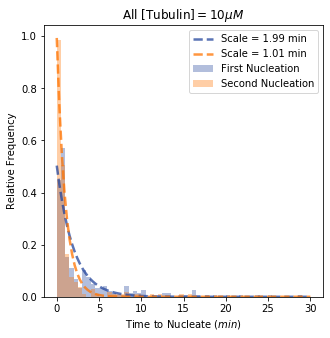

<Figure size 432x288 with 0 Axes>

In [129]:
datos = data['Time to Nucleate (min)'].dropna()
datos2 = data_2Nuc['Time to Nucleate (min)'].dropna()

first_nuc = exponential_fit(datos)
second_nuc = exponential_fit(datos2)

fig = plt.figure(figsize=(5,5))
scale0 = first_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=blue, label = "First Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=blue,label = "Scale = %.2f min" %(scale0))

datos = datos2
scale0 = second_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=orange,label = "Second Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=orange,label = "Scale = %.2f min" %(scale0))

plt.ylabel('Relative Frequency')
plt.xlabel('Time to Nucleate ' r'$(min)$')
plt.title('All [Tubulin]' r'$= 10\mu M$')
plt.legend(loc='upper right')
plt.show()
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

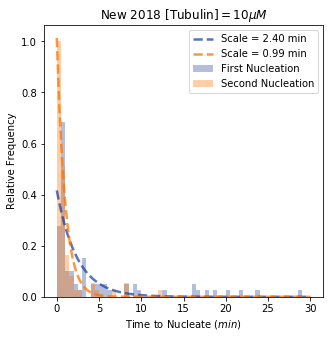

<Figure size 432x288 with 0 Axes>

In [130]:
datos = data[data['Name'] == 'New 2018 New DTT']['Time to Nucleate (min)'].dropna()
datos2 = data_2Nuc[data_2Nuc['Name'] == 'New 2018 New DTT']['Time to Nucleate (min)'].dropna()

first_nuc = exponential_fit(datos)
second_nuc = exponential_fit(datos2)

fig = plt.figure(figsize=(5,5))
scale0 = first_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=blue, label = "First Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=blue,label = "Scale = %.2f min" %(scale0))

datos = datos2
scale0 = second_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=orange,label = "Second Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=orange,label = "Scale = %.2f min" %(scale0))

plt.ylabel('Relative Frequency')
plt.xlabel('Time to Nucleate ' r'$(min)$')
plt.title('New 2018 [Tubulin]' r'$= 10\mu M$')
plt.legend(loc='upper right')
plt.show()
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

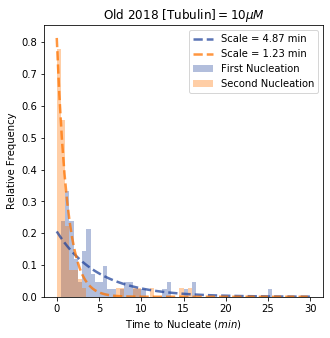

<Figure size 432x288 with 0 Axes>

In [127]:
datos = data[data['Name'] == 'Old 2018 New DTT']['Time to Nucleate (min)'].dropna()
datos2 = data_2Nuc[data_2Nuc['Name'] == 'Old 2018 New DTT']['Time to Nucleate (min)'].dropna()

first_nuc = exponential_fit(datos)
second_nuc = exponential_fit(datos2)

fig = plt.figure(figsize=(5,5))
scale0 = first_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=blue, label = "First Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=blue,label = "Scale = %.2f min" %(scale0))

datos = datos2
scale0 = second_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=orange,label = "Second Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=orange,label = "Scale = %.2f min" %(scale0))

plt.ylabel('Relative Frequency')
plt.xlabel('Time to Nucleate ' r'$(min)$')
plt.title('Old 2018 [Tubulin]' r'$= 10\mu M$')
plt.legend(loc='upper right')
plt.show()
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

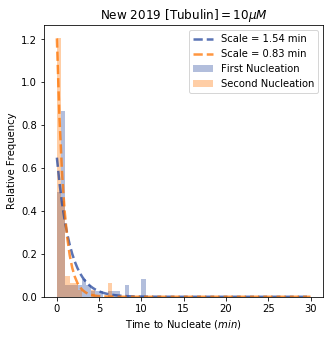

<Figure size 432x288 with 0 Axes>

In [132]:
datos = data[data['Name'] == 'New 2019 New DTT']['Time to Nucleate (min)'].dropna()
datos2 = data_2Nuc[data_2Nuc['Name'] == 'New 2019 New DTT']['Time to Nucleate (min)'].dropna()

first_nuc = exponential_fit(datos)
second_nuc = exponential_fit(datos2)

fig = plt.figure(figsize=(5,5))
scale0 = first_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=blue, label = "First Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=blue,label = "Scale = %.2f min" %(scale0))

datos = datos2
scale0 = second_nuc['scale e']['Value']
n, bins, patches = plt.hist(datos, bins=np.arange(0, 30 + 0.5, 0.5), density=True, alpha=0.35,facecolor=orange,label = "Second Nucleation");
x = np.linspace(0, bins[-1], 100)
plt.plot(x, sp.stats.expon.pdf(x,0,scale0),'--', lw=2.5, alpha=0.75,color=orange,label = "Scale = %.2f min" %(scale0))

plt.ylabel('Relative Frequency')
plt.xlabel('Time to Nucleate ' r'$(min)$')
plt.title('New 2019 [Tubulin]' r'$= 10\mu M$')
plt.legend(loc='upper right')
plt.show()
plt.tight_layout()


In [164]:
file = filedialog.askopenfilename()
path = Path(file)
data = pd.read_csv(path, encoding='utf-8')
data

,Date,CH,[Tubulin] $(\mu M)$,[DCX] $(\mu M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$
0,2020-01-09,12,7.0,100.0,11.0775,9.485000,1.167897,0.180667,7.2795,1.987333,3.662949
1,2020-01-09,12,7.0,100.0,12.6600,11.382000,1.112283,0.542000,5.8869,1.535667,3.833449
2,2020-01-09,12,7.0,100.0,6.6465,6.504000,1.021910,23.757667,0.5064,0.451667,1.121181
3,2020-01-09,12,7.0,100.0,19.3065,18.699000,1.032488,1.355000,10.6977,5.871667,1.821919
4,2020-01-09,12,7.0,100.0,4.7475,5.239333,0.906127,15.627667,2.9118,0.090333,32.233948
5,2020-01-09,12,7.0,100.0,28.0419,24.661000,1.137095,0.451667,20.6991,8.310667,2.490667
6,2020-01-09,12,7.0,100.0,13.8627,11.020667,1.257882,0.813000,2.6586,0.993667,2.675545
7,2020-01-09,12,7.0,100.0,6.3933,4.426333,1.444378,0.361333,0.7596,0.361333,2.102214
8,2020-01-09,12,7.0,100.0,21.5220,18.518333,1.162200,0.000000,5.8869,0.813000,7.240959
9,2020-01-09,12,7.0,100.0,19.1166,21.047667,0.908253,2.529333,17.7873,2.439000,7.292866


In [165]:
#data['Concentration ' r'$(\mu M)$'] = 7.7
#data = data.rename(columns={'Concentration ' r'$(\mu M)$': '[Tubulin] ' r'$(\mu M)$'})
data['[Tubulin] ' r'$(\mu M)$'] = 7.7

In [166]:
data.to_csv(path, encoding='utf-8', index=False)
data

,Date,CH,[Tubulin] $(\mu M)$,[DCX] $(\mu M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$
0,2020-01-09,12,7.7,100.0,11.0775,9.485000,1.167897,0.180667,7.2795,1.987333,3.662949
1,2020-01-09,12,7.7,100.0,12.6600,11.382000,1.112283,0.542000,5.8869,1.535667,3.833449
2,2020-01-09,12,7.7,100.0,6.6465,6.504000,1.021910,23.757667,0.5064,0.451667,1.121181
3,2020-01-09,12,7.7,100.0,19.3065,18.699000,1.032488,1.355000,10.6977,5.871667,1.821919
4,2020-01-09,12,7.7,100.0,4.7475,5.239333,0.906127,15.627667,2.9118,0.090333,32.233948
5,2020-01-09,12,7.7,100.0,28.0419,24.661000,1.137095,0.451667,20.6991,8.310667,2.490667
6,2020-01-09,12,7.7,100.0,13.8627,11.020667,1.257882,0.813000,2.6586,0.993667,2.675545
7,2020-01-09,12,7.7,100.0,6.3933,4.426333,1.444378,0.361333,0.7596,0.361333,2.102214
8,2020-01-09,12,7.7,100.0,21.5220,18.518333,1.162200,0.000000,5.8869,0.813000,7.240959
9,2020-01-09,12,7.7,100.0,19.1166,21.047667,0.908253,2.529333,17.7873,2.439000,7.292866
